In [3]:
import numpy as np, pandas as pd
import re
import matplotlib.pyplot as plt

In [30]:
run1 = 'server1.txt'
run2 = 'server_all.txt'

In [31]:
df_small= pd.read_csv(run1, delimiter=',')
df_small =df_small[df_small['id:sent'].str.startswith('T')]
df_small = df_small[df_small['op'] != 'IMG_RETRIEVE']



In [54]:
df_all= pd.read_csv('server_all.txt', delimiter=',')
df_all =df_all[df_all['id:sent'].str.startswith('T')]
df_all = df_all.iloc[:, [0, 1, 2, 3,4,5,6,7]]
df_all = df_all[df_all['op'] != 'IMG_RETRIEVE']
df_allo1= pd.read_csv('server_allo1.txt', delimiter=',')
df_allo1 =df_allo1[df_allo1['id:sent'].str.startswith('T')]
df_allo1 = df_allo1.iloc[:, [0, 1, 2, 3,4,5,6,7]]
df_allo1 = df_allo1[df_allo1['op'] != 'IMG_RETRIEVE']
df_allo2= pd.read_csv('server_allo2.txt', delimiter=',')
df_allo2 =df_allo2[df_allo2['id:sent'].str.startswith('T')]
df_allo2 = df_allo2.iloc[:, [0, 1, 2, 3,4,5,6,7]]
df_allo2 = df_allo2[df_allo2['op'] != 'IMG_RETRIEVE']



In [58]:
df_all['Responsetime'] = df_all['complete'].astype(float) - df_all['start'].astype(float)

In [59]:
print(df_all)

                   id:sent              op ow client img id server img id  \
0       T1 R0:30846.883794    IMG_REGISTER  1             1             0   
2       T0 R1:30847.287695  IMG_HORIZEDGES  1             0             0   
3       T0 R2:30847.593603     IMG_SHARPEN  1             0             0   
4       T0 R3:30847.637904     IMG_SHARPEN  1             0             0   
6       T1 R5:30847.901857    IMG_REGISTER  1             0             1   
...                    ...             ... ..           ...           ...   
1129  T0 R993:31072.254275        IMG_BLUR  1            84            84   
1130  T0 R994:31072.596785   IMG_VERTEDGES  1           124           124   
1132  T0 R996:31073.629361     IMG_SHARPEN  1            85            85   
1133  T0 R997:31073.705027        IMG_BLUR  1             4             4   
1135  T1 R999:31074.048837    IMG_REGISTER  1             0           136   

           receipt         start      complete  Responsetime  
0     30846.

In [47]:
df_small['sent'] = df_small['id:sent'].apply(lambda x: float(x.split(':')[1]))
df_small['complete'] = df_small['complete'].astype(float)
df_small['Responsetime'] = df_small['complete'] - df_small['sent']


print(df_small.op.unique())

['IMG_REGISTER' 'IMG_HORIZEDGES' 'IMG_SHARPEN' 'IMG_BLUR' 'IMG_ROT90CLKW'
 'IMG_VERTEDGES']


In [79]:
df_allo1['Responsetime'] = df_allo1['complete'].astype(float) - df_allo1['start'].astype(float)
df_allo2['Responsetime'] = df_allo2['complete'].astype(float) - df_allo2['start'].astype(float)
print(df_allo2["Responsetime"])

0       0.003264
2       0.035308
3       0.031489
4       0.032121
6       0.001642
          ...   
1129    0.125852
1130    0.031348
1132    0.096823
1133    0.158956
1135    0.001053
Name: Responsetime, Length: 852, dtype: float64


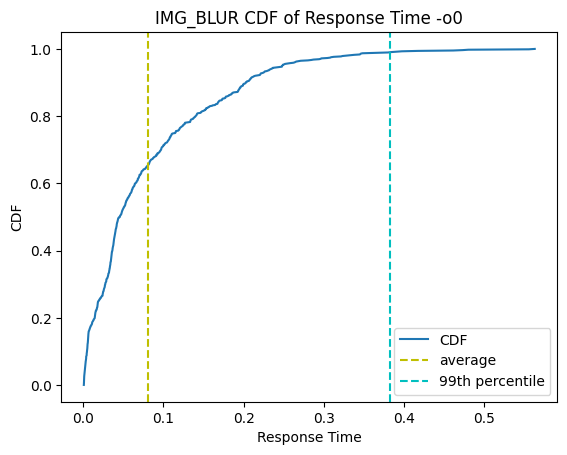

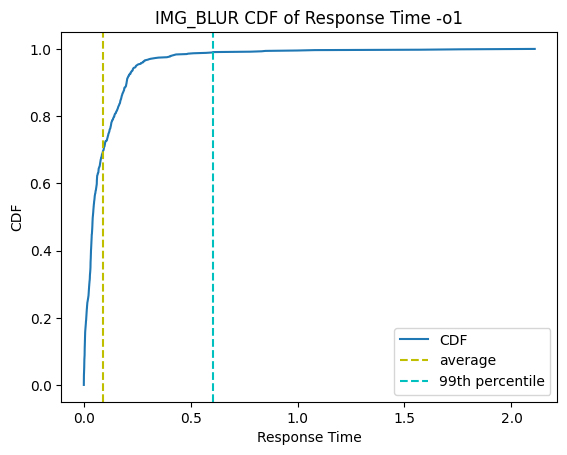

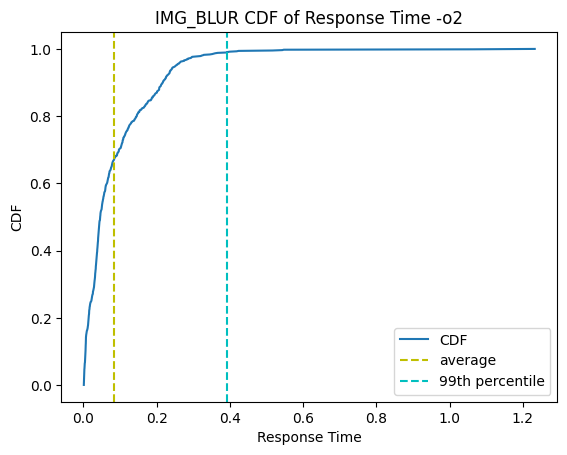

In [82]:
dfs = [df_all, df_allo1,df_allo2]
a = -1
for df in dfs:
    df_op = df
    data1 = np.sort(df_op["Responsetime"])
    cdf1 = np.arange(1, len(data1)+1) / len(data1)
    avg1 = np.mean(data1)
    p99_1 = np.percentile(data1, 99)
    a += 1
    plt.figure()
    plt.plot(data1, cdf1, label="CDF")
    plt.axvline(avg1, color='y', linestyle='dashed', label="average")
    plt.axvline(p99_1, color='c', linestyle='dashed', label="99th percentile")
    plt.title(f"IMG_BLUR CDF of Response Time -o{a}")
    plt.xlabel("Response Time")
    plt.ylabel("CDF")
    plt.legend()

    plt.show()

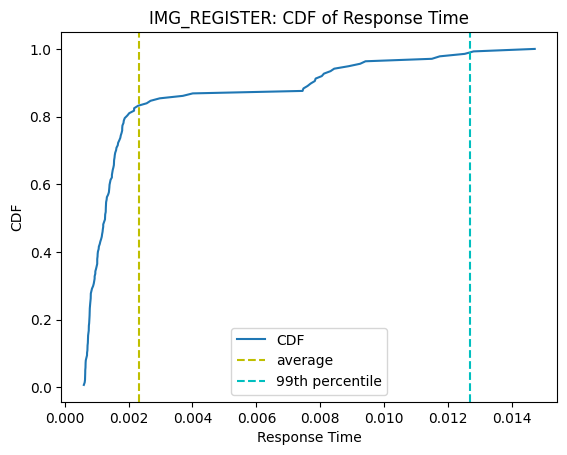

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# 创建包含所有操作的列表
operations = ['IMG_REGISTER', 'IMG_HORIZEDGES', 'IMG_SHARPEN', 'IMG_BLUR', 'IMG_ROT90CLKW', 'IMG_VERTEDGES']

# 使用循环为每个操作生成CDF图
for op in operations:
    # 筛选特定操作的响应时间
    df_op = df_all[df_all['op'] == op]
    data = np.sort(df_op['Responsetime'])

    # 计算CDF
    cdf = np.arange(1, len(data)+1) / len(data)

    # 计算平均值和99百分位数
    avg = np.mean(data)
    p99 = np.percentile(data, 99)

    # 绘制CDF图
    plt.figure()
    plt.plot(data, cdf, label=f"CDF of {op}")
    plt.axvline(avg, color='y', linestyle='dashed', label="Average")
    plt.axvline(p99, color='c', linestyle='dashed', label="99th Percentile")
    plt.title(f"{op}: CDF of Response Time (all)")
    plt.xlabel("Response Time")
    plt.ylabel("CDF")
    x_limits = [0,0.08]
    y_limits = [0,1]
    plt.xlim(x_limits)
    plt.ylim(y_limits)
    plt.legend()
    plt.grid(True)
    plt.show()


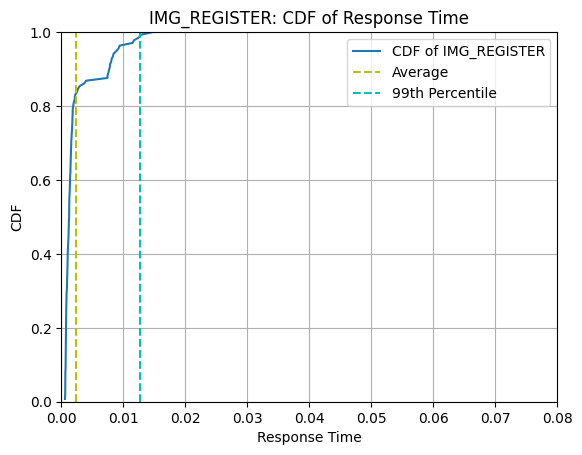

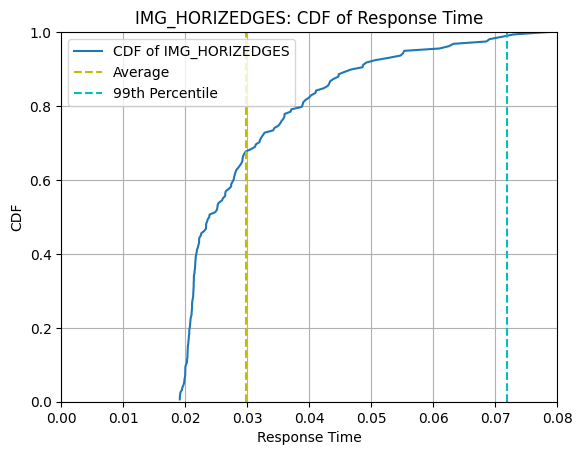

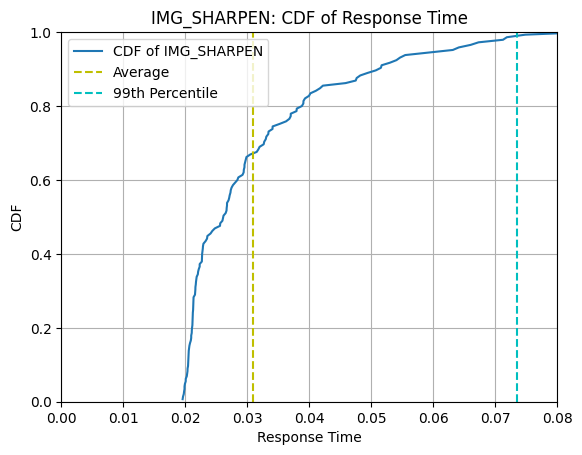

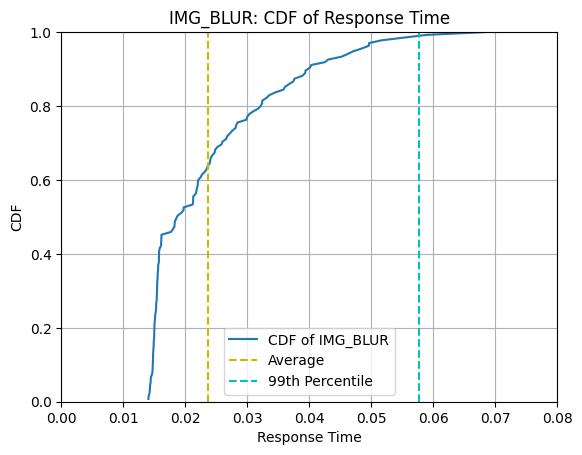

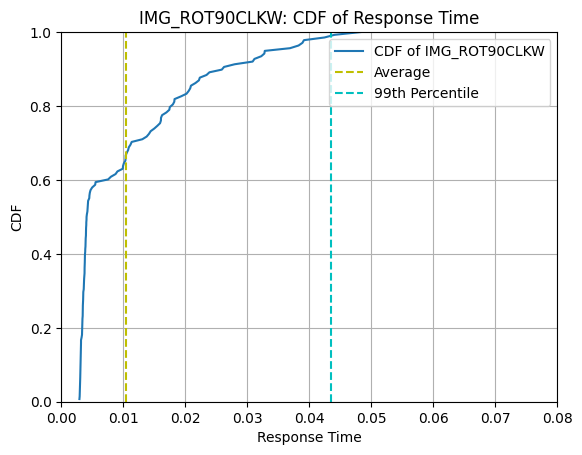

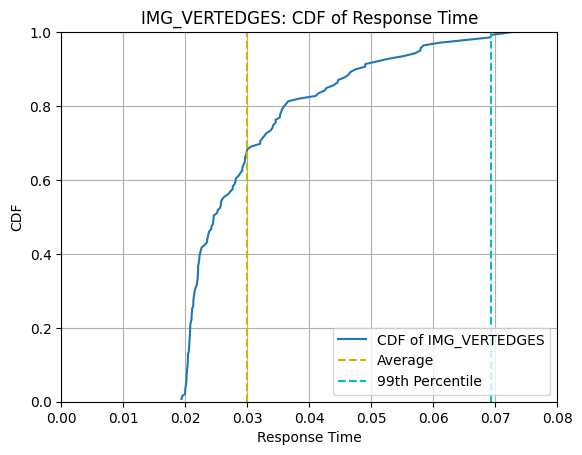

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# 创建包含所有操作的列表
operations = ['IMG_REGISTER', 'IMG_HORIZEDGES', 'IMG_SHARPEN', 'IMG_BLUR', 'IMG_ROT90CLKW', 'IMG_VERTEDGES']

# 使用循环为每个操作生成CDF图
for op in operations:
    # 筛选特定操作的响应时间
    df_op = df_small[df_small['op'] == op]
    data = np.sort(df_op['Responsetime'])

    # 计算CDF
    cdf = np.arange(1, len(data)+1) / len(data)

    # 计算平均值和99百分位数
    avg = np.mean(data)
    p99 = np.percentile(data, 99)

    # 绘制CDF图
    plt.figure()
    plt.plot(data, cdf, label=f"CDF of {op}")
    plt.axvline(avg, color='y', linestyle='dashed', label="Average")
    plt.axvline(p99, color='c', linestyle='dashed', label="99th Percentile")
    plt.title(f"{op}: CDF of Response Time")
    plt.xlabel("Response Time")
    plt.ylabel("CDF")
    x_limits = [0,0.08]
    y_limits = [0,1]
    plt.xlim(x_limits)
    plt.ylim(y_limits)
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Python伪代码
alpha = 0.7
estimates = { 
    'IMG_ROT90CLKW': {'estimate': initial_value, 'count': 0},
    'IMG_HORIZEDGES': {'estimate': initial_value, 'count': 0},
    # ... 对于所有操作类型初始化
}
def update_estimate(operation_type, actual_job_length):
    old_estimate = estimates[operation_type]['estimate']
    new_estimate = alpha * actual_job_length + (1 - alpha) * old_estimate
    estimates[operation_type]['estimate'] = new_estimate
    estimates[operation_type]['count'] += 1
def calculate_error(operation_type, actual_job_length):
    prediction = estimates[operation_type]['estimate']
    error = abs(prediction - actual_job_length)
    update_estimate(operation_type, actual_job_length)
    return error
def calculate_average_error(errors):
    return sum(errors) / len(errors)



In [71]:
data = df_all["Responsetime"]

ewma = data.ewm(alpha=0.7, adjust=False).mean()
estimated_next_response_time = ewma.iloc[-1]
print(len(data))

852


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设 df_all 是你的原始 DataFrame，并且它有两列：'Actual' 和 'Predicted'
# 'Actual' 是作业的实际完成时间
# 'Predicted' 是预测的完成时间

# 计算误差
df_all['Error'] = df_all['Responsetime'] - ewma

# 分析误差
mean_error = df_all['Error'].mean()
std_error = df_all['Error'].std()

print(f"Mean Error: {mean_error}")
print(f"Standard Deviation of Error: {std_error}")


Mean Error: 1.390062095729973e-05
Standard Deviation of Error: 0.03144708302095279


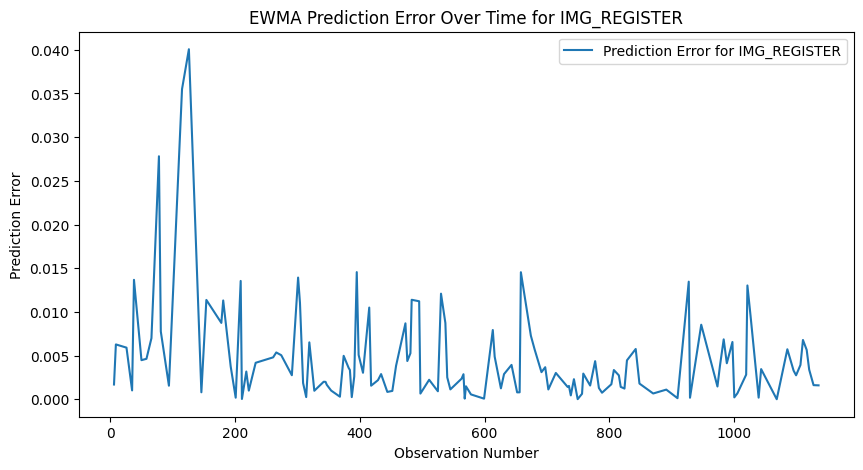

IMG_REGISTER Average Prediction Error: 0.004625245019825232


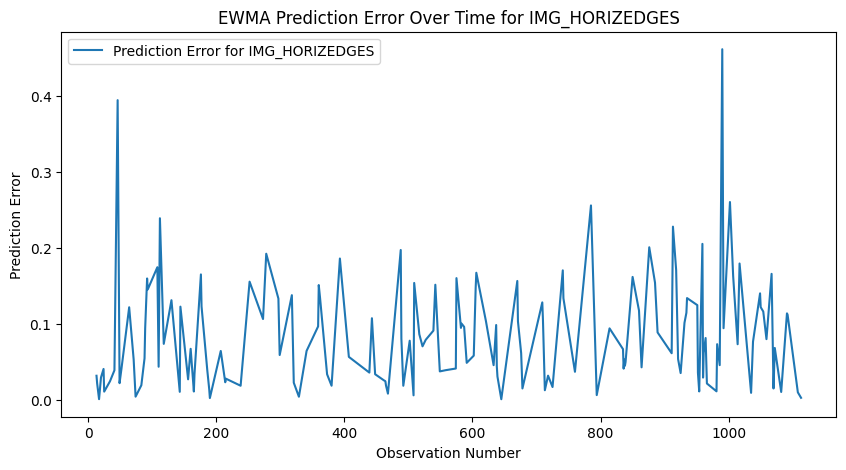

IMG_HORIZEDGES Average Prediction Error: 0.08329525962175431


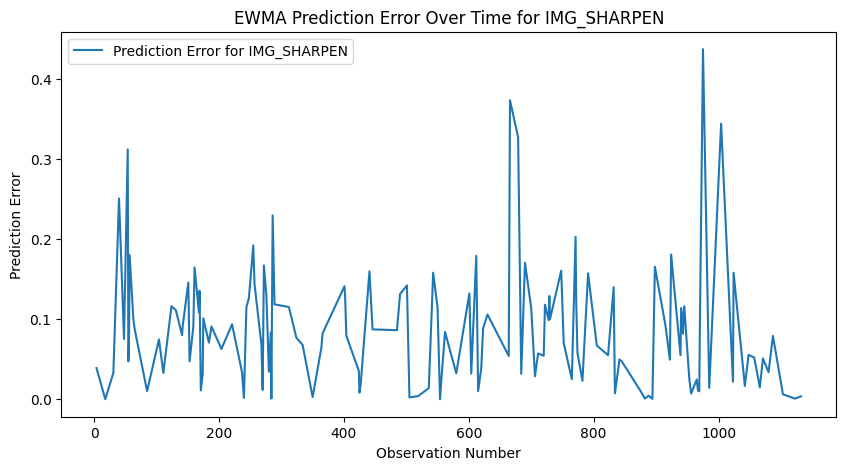

IMG_SHARPEN Average Prediction Error: 0.08644917871722721


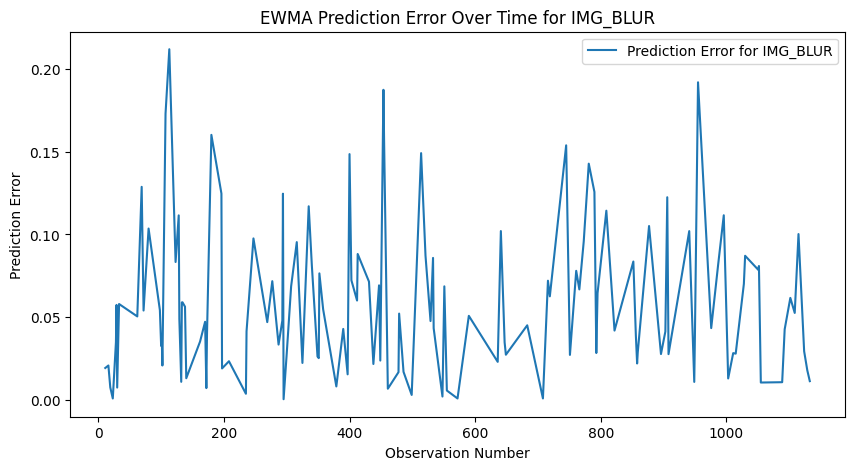

IMG_BLUR Average Prediction Error: 0.058701672000486635


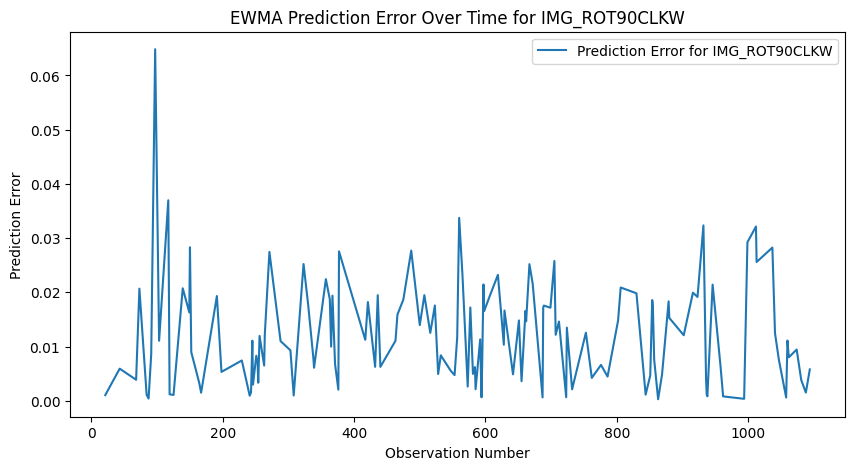

IMG_ROT90CLKW Average Prediction Error: 0.0123021727646954


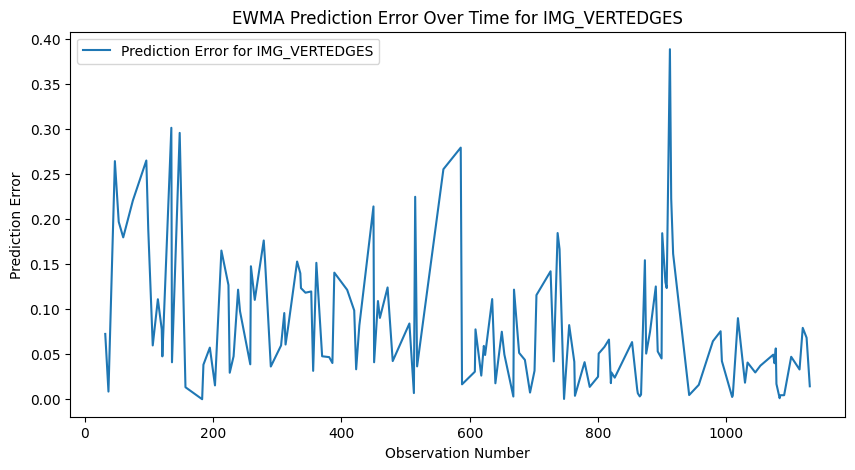

IMG_VERTEDGES Average Prediction Error: 0.08311778609474982


In [77]:
import matplotlib.pyplot as plt

# List of unique operations
operations = ['IMG_REGISTER', 'IMG_HORIZEDGES', 'IMG_SHARPEN', 'IMG_BLUR', 'IMG_ROT90CLKW', 'IMG_VERTEDGES']

# Loop through each operation type to plot prediction errors over time
for op in operations:
    # Filter data for the current operation
    df_op = df_all[df_all['op'] == op]
    data = df_op['Responsetime']

    # Compute EWMA with alpha=0.7
    ewma = data.ewm(alpha=0.7, adjust=False).mean()

    # Calculate prediction errors starting from the second observation
    prediction_errors = abs(data[1:] - ewma.shift(1)[1:])

    # Plot prediction errors over time
    plt.figure(figsize=(10, 5))
    plt.plot(prediction_errors.index, prediction_errors, label=f'Prediction Error for {op}')
    plt.xlabel('Observation Number')
    plt.ylabel('Prediction Error')
    plt.title(f'EWMA Prediction Error Over Time for {op}')
    plt.legend()
    plt.show()

    # Compute and print the average prediction error for each operation type
    average_prediction_error = prediction_errors.mean()
    print(f'{op} Average Prediction Error: {average_prediction_error}')
